**Quality Prediction in a Mining Process**
---

#**ABOUT**

---



The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much **silica (impurity)** is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate). Dissolved air flotation (DAF) is a water treatment process that clarifies wastewaters (or other waters) by the removal of **suspended matter such as oil or solids**. The removal is achieved by **dissolving air in the water or wastewater under pressure and then releasing the air at atmospheric pressure in a flotation tank basin**. The released air forms tiny bubbles which adhere to the suspended matter causing **the suspended matter to float to the surface of the water where it may then be removed by a skimming device**.

**LOADING NECESSARY LIBRARIES**





In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle

**LOADING DATASET INTO DATAFRAME**




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Luminar_Project/MiningProcess_Flotation_Plant_Database1.csv')
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,3/10/2017 1:00,55.20,"16,98","3019,53","557,434","395,713","100,664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,3/10/2017 1:00,55.20,"16,98","3024,41","563,965","397,383","100,672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,3/10/2017 1:00,55.20,"16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,3/10/2017 1:00,NaN,"16,98","3047,36","568,665","397,939","100,689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,3/10/2017 1:00,55.20,"16,98","3033,69","558,167","400,254","100,697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,5/8/2017 14:00,56.65,"14,83","4612,8","529,337","395,171","101,514","172,731","250,412","249,528",...,"299,1","452,565","459,927","457,081","362,874","341,411","395,299","359,746","64,75","3,66"
199996,5/8/2017 14:00,56.65,"14,83","4618,62","528,84","394,132","101,523","172,672","250,336","250,628",...,"299,846","451,398","454,189","457,743","365,863","342,465","375,963","359,874","64,75","3,66"
199997,5/8/2017 14:00,56.65,"14,83","4622,71","524,154","393,519","101,532","172,613","249,876","253,695",...,"302,913","448,254","435,214","455,107","364,227","347,078","305,607","360,259","64,75","3,66"
199998,5/8/2017 14:00,56.65,"14,83","4574,97","525,557","393,948","101,542","172,554","250,075","252,96",...,"304,328","451,293","437,099","454,088","361,007","348,312","320,574","352,59","64,75","3,66"


#**DATA Preprocessing**



**FINDING MISSING VALUE**




In [ ]:
df.isna().sum()

date                            0
% Iron Feed                     2
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

**FINDING DATA TYPES**



In [ ]:
df.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                    object
Starch Flow                      object
Amina Flow                       object
Ore Pulp Flow                    object
Ore Pulp pH                      object
Ore Pulp Density                 object
Flotation Column 01 Air Flow     object
Flotation Column 02 Air Flow     object
Flotation Column 03 Air Flow     object
Flotation Column 04 Air Flow     object
Flotation Column 05 Air Flow     object
Flotation Column 06 Air Flow     object
Flotation Column 07 Air Flow     object
Flotation Column 01 Level        object
Flotation Column 02 Level        object
Flotation Column 03 Level        object
Flotation Column 04 Level        object
Flotation Column 05 Level        object
Flotation Column 06 Level        object
Flotation Column 07 Level        object
% Iron Concentrate               object
% Silica Concentrate             object
dtype: object

**Data cleaning steps such as Filling  missing values, coverting commas to dots, etc..**




In [ ]:
df['% Iron Feed']=df['% Iron Feed'].fillna(df['% Iron Feed'].mean())


In [ ]:
for column in df.columns:
    if column not in '% Iron Feed':
        df[column] = df[column].str.replace(',', '.')

In [ ]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,3/10/2017 1:00,55.200000,16.98,3019.53,557.434,395.713,100.664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,3/10/2017 1:00,55.200000,16.98,3024.41,563.965,397.383,100.672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,3/10/2017 1:00,55.200000,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,3/10/2017 1:00,55.693845,16.98,3047.36,568.665,397.939,100.689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,3/10/2017 1:00,55.200000,16.98,3033.69,558.167,400.254,100.697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,5/8/2017 14:00,56.650000,14.83,4612.8,529.337,395.171,101.514,172.731,250.412,249.528,...,299.1,452.565,459.927,457.081,362.874,341.411,395.299,359.746,64.75,3.66
199996,5/8/2017 14:00,56.650000,14.83,4618.62,528.84,394.132,101.523,172.672,250.336,250.628,...,299.846,451.398,454.189,457.743,365.863,342.465,375.963,359.874,64.75,3.66
199997,5/8/2017 14:00,56.650000,14.83,4622.71,524.154,393.519,101.532,172.613,249.876,253.695,...,302.913,448.254,435.214,455.107,364.227,347.078,305.607,360.259,64.75,3.66
199998,5/8/2017 14:00,56.650000,14.83,4574.97,525.557,393.948,101.542,172.554,250.075,252.96,...,304.328,451.293,437.099,454.088,361.007,348.312,320.574,352.59,64.75,3.66


In [ ]:
df.drop(['date'],axis=1,inplace=True)

**TRANSFORMING CATEGORICAL DATA INTO NUMERIC**






In [ ]:
encoder=LabelEncoder()
cols=['% Silica Feed','Starch Flow','Amina Flow','Ore Pulp Flow','Ore Pulp pH','Ore Pulp Density','Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','Flotation Column 04 Air Flow','Flotation Column 05 Air Flow','Flotation Column 06 Air Flow','Flotation Column 07 Air Flow','Flotation Column 01 Level','Flotation Column 02 Level','Flotation Column 03 Level','Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level','% Iron Concentrate','% Silica Concentrate']
for i in cols:
  df[i]=encoder.fit_transform(df[i])

**Finding correlation and removing features which have almost no correlation**


In [ ]:
X_dummy=df.drop(['% Silica Concentrate'],axis=1)

In [ ]:
y_dummy=df['% Silica Concentrate']
y_dummy

0           42
1           42
2           42
3           42
4           42
          ... 
199995    4159
199996    4159
199997    4159
199998    4159
199999    4159
Name: % Silica Concentrate, Length: 200000, dtype: int64

In [ ]:
correlation=X_dummy.corrwith(y_dummy)
correlation

% Iron Feed                     0.006080
% Silica Feed                   0.017967
Starch Flow                     0.029442
Amina Flow                      0.066444
Ore Pulp Flow                   0.019446
Ore Pulp pH                     0.041098
Ore Pulp Density               -0.000558
Flotation Column 01 Air Flow   -0.019595
Flotation Column 02 Air Flow   -0.004214
Flotation Column 03 Air Flow   -0.011382
Flotation Column 04 Air Flow    0.191476
Flotation Column 05 Air Flow   -0.040705
Flotation Column 06 Air Flow    0.061249
Flotation Column 07 Air Flow    0.063463
Flotation Column 01 Level      -0.099387
Flotation Column 02 Level      -0.115666
Flotation Column 03 Level      -0.110601
Flotation Column 04 Level      -0.077615
Flotation Column 05 Level      -0.124992
Flotation Column 06 Level      -0.091300
Flotation Column 07 Level      -0.081126
% Iron Concentrate             -0.748953
dtype: float64

**PLOTING THE CORRELATION ON A GRAPH**



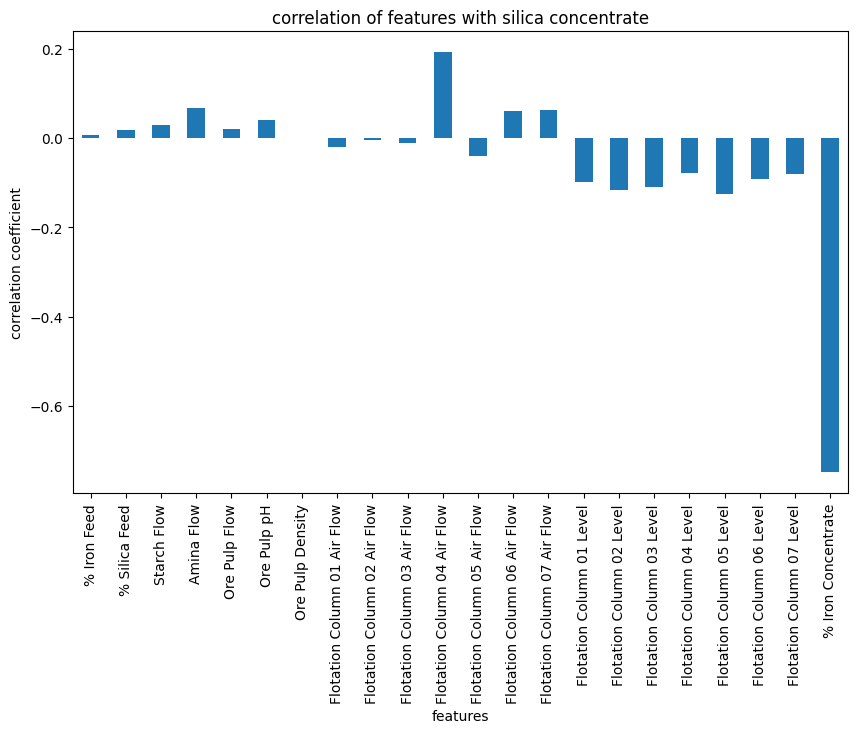

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('correlation coefficient')
plt.title('correlation of features with silica concentrate')
plt.show()

**THE COLUMN WITH LEAST CORRELATION IS DROPPED**



In [ ]:
df.drop(['% Iron Feed','Ore Pulp Density'],axis=1,inplace=True)

**CREATING ATTRIBUTES**



In [ ]:
X=df.drop(['% Silica Concentrate'],axis=1)
X

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,52,89352,101741,13868,1010,15189,31655,18202,30896,64016,6753,6729,25771,15482,9507,91326,103437,80309,112764,16463
1,52,89431,106111,15570,1017,15694,28952,18488,30896,64016,6665,4839,21576,14318,10895,94468,102600,80011,108197,16463
2,52,89687,108440,17907,68,15716,26294,17939,30896,64016,7872,3916,21066,38580,11346,95585,100715,81309,93362,16463
3,52,89743,108777,16135,1033,15892,32896,17675,30896,64016,6950,6992,22038,33089,15571,93161,97230,74799,73060,16463
4,52,89560,102260,30274,1040,16178,30556,17521,30896,64016,6511,4773,22038,29117,21805,98356,92838,78507,72025,16463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,43,112529,82605,13312,1776,16387,27948,18449,33999,37935,21855,20707,22143,34298,27082,42934,15377,50983,33205,11971
199996,43,112553,82281,12254,1784,16311,29048,19095,34157,38253,21817,21453,21191,30132,27540,44712,16029,41077,33280,11971
199997,43,112581,79347,11640,1792,15851,32115,19402,36526,59847,21702,24546,18606,16496,25549,43768,19226,10025,33514,11971
199998,43,112294,80229,12070,1801,16050,31380,18512,57188,59874,21819,25878,21105,17479,24767,41794,20106,13543,28587,11971


In [ ]:
y=df['% Silica Concentrate']
y

0           42
1           42
2           42
3           42
4           42
          ... 
199995    4159
199996    4159
199997    4159
199998    4159
199999    4159
Name: % Silica Concentrate, Length: 200000, dtype: int64

**SCALING THE ATTRIBUTES**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.46017699, 0.68335959, 0.81656715, ..., 0.61065446, 0.84954232,
        0.99854431],
       [0.46017699, 0.68396378, 0.8516405 , ..., 0.60838852, 0.81513542,
        0.99854431],
       [0.46017699, 0.68592165, 0.87033292, ..., 0.61825827, 0.70337138,
        0.99854431],
       ...,
       [0.38053097, 0.86101381, 0.63683425, ..., 0.07622821, 0.25248804,
        0.72608722],
       [0.38053097, 0.85881885, 0.64391313, ..., 0.10297841, 0.21536897,
        0.72608722],
       [0.38053097, 0.85358001, 0.66783043, ..., 0.31232654, 0.12750217,
        0.72608722]])

**SPLITTING THE DATASET INTO TRAINING AND TESTING**



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

#**CREATING MODELS AND CHECKING PERFORMANCE**

---

In [ ]:
mlr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=5)
dt=DecisionTreeRegressor(random_state=42)
ada=AdaBoostRegressor(random_state=42)
gr=GradientBoostingRegressor(random_state=42)
rf=RandomForestRegressor(random_state=42)

In [ ]:
models=[mlr,knn,dt,ada,gr,rf]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_sore= ',r2_score(y_test,y_pred))
  print('mean_absolute_error= ',mean_absolute_error(y_test,y_pred))
  print('mean_squared_error= ',mean_squared_error(y_test,y_pred))
  print('root_mean_squared_error= ',np.sqrt(mean_squared_error(y_test,y_pred)))
  print("_"*200)

LinearRegression()
r2_sore=  0.5919641157084952
mean_absolute_error=  2728.7915952820204
mean_squared_error=  17766642.423096083
root_mean_squared_error=  4215.049516090658
________________________________________________________________________________________________________________________________________________________________________________________________________
KNeighborsRegressor()
r2_sore=  0.9189131309599224
mean_absolute_error=  683.5310633333335
mean_squared_error=  3530673.3130713333
root_mean_squared_error=  1879.008598455934
________________________________________________________________________________________________________________________________________________________________________________________________________
DecisionTreeRegressor(random_state=42)
r2_sore=  0.9778818177278285
mean_absolute_error=  143.17998333333333
mean_squared_error=  963066.8541833333
root_mean_squared_error=  981.3596966369331
__________________________________________________________

**PLOTTING THE MODELS ACCURACY ON BAR GRAPH**



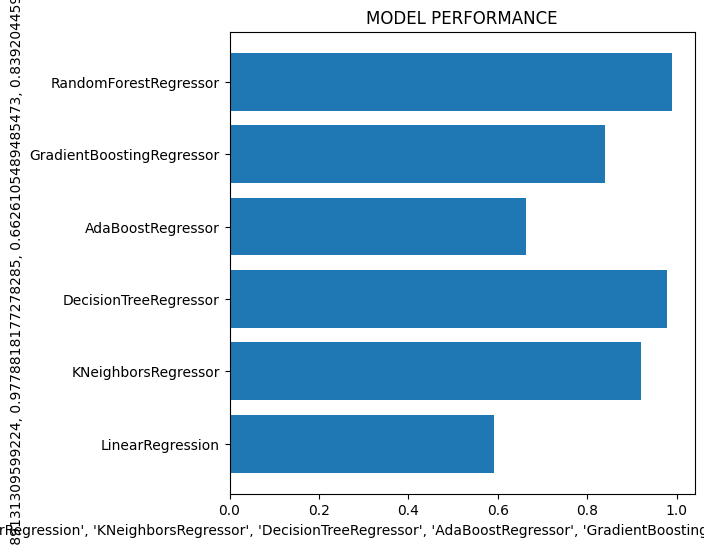

In [ ]:
mod=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","AdaBoostRegressor","GradientBoostingRegressor","RandomForestRegressor"]
r2=[0.5919641157084952,0.9189131309599224,0.9778818177278285,0.6626105489485473,0.8392044596403293,0.98984530033088]
plt.figure(figsize=(6,6))
plt.barh(mod,r2)
plt.title("MODEL PERFORMANCE")
plt.xlabel(mod)
plt.ylabel(r2)
plt.show()

In [ ]:
pickle.dump(model,open('Mining_Quality_model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmaxscaler.sav','wb'))